In [25]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils.file import load_tab, save_np, load_np, read_json2dict, dump_list2json, read_json2list
import params.PDBparser as paramsPDB

**functions**

In [22]:
def count_disordered_aa(reference):
    '''
    count the number disordered residues;
    params:
        reference - str, 0/1s. e.g. '110000000000000'
    return:
        count - number of 1s
    '''
    count = sum([int(r) for r in reference])
    return count

In [23]:
def bin_count(df_data, bins: list, len_col: str):
    '''
    count the number of items for each bin. For length distribution plots.
    '''
    loop_length = list(df_data[len_col])
    
    cls = [np.round(np.random.rand(),1), np.round(np.random.rand(),1),np.round(np.random.rand(),1), 0.8]
    print(cls)
    plt.figure(figsize=(12, 6))
    counts, edges, bars = plt.hist(loop_length, bins=bins, color=cls)
    
    return counts, loop_length, edges

**Data processing**

In [17]:
list_entityDataset = read_json2list(paramsPDB.path_IDRdataset_100)
df_entityDataset = pd.DataFrame(list_entityDataset)
df_entityDataset.shape[0]

231624

In [18]:
df_entityDataset[:2]

,id,sequence,reference,clstr_id,fold
0,120L_1,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSAKSEL...,0000000000000000000000000000000000000000000000...,7DDZ_1,5
1,13GS_1,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,1100000000000000000000000000000000000000000000...,6LLX_1,5


In [30]:
df_entityDataset['length'] = [len(seq) for seq in df_entityDataset['sequence']]
df_entityDataset['len_idr'] = [count_disordered_aa(r) for r in df_entityDataset['reference']]
df_entityDataset['p_idr'] = df_entityDataset['len_idr']/df_entityDataset['length']

In [31]:
df_entityIDR = df_entityDataset.loc[df_entityDataset['len_idr']>0, :]

In [32]:
df_entityDataset.sort_values(by='length')

,id,sequence,reference,clstr_id,fold,length,len_idr,p_idr
10654,6PJ4_2,VRM,000,6PJ4_2,4,3,0,0.000000
125142,5ONR_2,IIG,000,5ONR_2,4,3,0,0.000000
19333,4TR9_4,DWN,000,4TR9_4,3,3,0,0.000000
121394,4FLG_3,QII,000,4FLG_3,2,3,0,0.000000
121395,4FLG_4,IEI,000,4FLG_4,2,3,0,0.000000
...,...,...,...,...,...,...,...,...
159962,4AKI_1,SPILGYWKIKGLVQPTRLLLEYLEEKYEEHLYERDEGDKWRNKKFE...,0000000000000000000000000000000000000000000000...,4AI6_1,2,2695,45,0.016698
68602,3VKG_1,MTRHHHHHHGGGDYKDDDDKGGGKVPVEEEIQDLKAVWVELSNTWQ...,1111111111111111111111111111111111111111111111...,3VKH_1,3,3245,207,0.063790
185261,3VKH_1,MTRHHHHHHGGGDYKDDDDKGGGKVPVEEEIQDLKAVWVELSNTWQ...,1111111111111111111111111111111111111111111111...,3VKH_1,3,3367,273,0.081081
96316,4RH7_1,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1111111111111111111111111111111111111111111111...,4RH7_1,3,3450,445,0.128986


In [35]:
df_entityIDR.sort_values(by='len_idr')

,id,sequence,reference,clstr_id,fold,length,len_idr,p_idr
93963,3NNK_1,MDITQFSQLNPPSRLLMGPGPINADPRVLRAMSSQLIGQYDPAMTH...,1000000000000000000000000000000000000000000000...,3ISL_1,1,411,1,0.002433
56928,4IN5_1,MALLSFERKYRVPGGTLVGGNLFDFWVGPFYVGFFGVATFFFAALG...,1000000000000000000000000000000000000000000000...,4V8K_3,3,282,1,0.003546
56946,4IU7_2,HKILHRLLQD,1000000000,5UAN_3,5,10,1,0.100000
56947,4IUE_1,GTILIDLSPDDKEFQSVEEEMQSTVREHRDGGHAGGIFNRYNILKI...,0000000000000000000000000000000000000000000000...,4UW1_1,2,210,1,0.004762
20658,5EL4_9,MEQYYGTGRRKEAVARVFLRPGNGKVTVNGQDFNEYFQGLVRAVAA...,1000000000000000000000000000000000000000000000...,4V6E_8,4,128,1,0.007812
...,...,...,...,...,...,...,...,...
140219,6SEQ_1,MPAPGALILLAAVSASGCLASPAHPDGFALGRAPLAPPYAVVLISC...,1111111111111111111111111111111111111111111111...,6SEQ_1,4,1460,1182,0.809589
127890,6XWU_1,MSKPQNNDTLELDDILSQPVKDKERFAAFMMRKLAENKPAQNDNLF...,1111111111111111111111111111111111111111111111...,6XWU_1,3,1411,1273,0.902197
191544,6XWV_1,MSKPQNNDTLELDDILSQPVKDKERFAAFMMRKLAENKPAQNDNLF...,1111111111111111111111111111111111111111111111...,6XWU_1,3,1411,1277,0.905032
88629,7F60_2,MFNKSFGTPFGGGTGGFGTTSTFGQNTGFGTTSGGAFGTSAFGSSN...,1111111111111111111111111111111111111111111111...,7F60_2,5,1817,1765,0.971381


In [36]:
df_entityIDR[df_entityIDR['len_idr']>70]

,id,sequence,reference,clstr_id,fold,length,len_idr,p_idr
99,1BGW_1,ENALKKSDGTRKSRITNYPKLEDANKAGTKEGYKCTLVLTEGDSAL...,1111111111000000000000000000000000000000000000...,4GFH_1,1,793,113,0.142497
154,1CJY_1,MSFIDPYQHIIVEHQYSHKFTVVVLRATKVTKGAFGDMLDTPDPYV...,1111111111110000000000000000000000000000000000...,1CJY_1,3,749,115,0.153538
489,1I50_1,MVGQQYSSAPLRTVKEVQFGLFSPEEVRAISVAKIRFPETMDETQT...,1000000000000000000000000000000000000000000000...,3H0G_1,3,1733,314,0.181189
490,1I50_2,MSDLANSEKYYDEDPYGFEDESAPITAEDSWAVISAFFREKGLVSQ...,1111111111111111100000000000000000000000000000...,5XOG_2,3,1224,130,0.106209
497,1I50_5,MSDYEEAFNDGNENFEDFDVEHFSDEETYEEKPQFKDGETTDANGK...,1111111111111111111111111111111111111111111111...,1I50_5,2,155,71,0.458065
...,...,...,...,...,...,...,...,...
231437,8BNY_1,MGNREQFDLSKYLLEKRKQKGLSQTQVANDTGLSSAYISMLEKGER...,1111111111111111111111111111111111111111111111...,8BNY_1,5,161,125,0.776398
231461,8CR4_1,MKYLLPTAAAGLLLLAAQPAMAMGADLIDVSKLPSKAAQGAPGPVT...,1111111111111111111111111111111111111111111111...,8CR3_1,5,514,216,0.420233
231493,8DJC_1,MHSSHHHHHHSSGENLYFQGHMSGRPRTTSFAESCKPVQQPSAFGS...,1111111111111111111111111111111111111111111111...,4ACG_1,2,441,107,0.242630
231564,8FK3_1,MHHHHHHSSGLVPRGSGMLETAAALFERNHMDSPDLGTDDDDLAMA...,1111111111111111111111111111111111111111111111...,5T94_2,5,510,84,0.164706


**Plots**

[0.7, 0.2, 0.2, 0.8]
[0.7, 0.0, 0.4, 0.8]


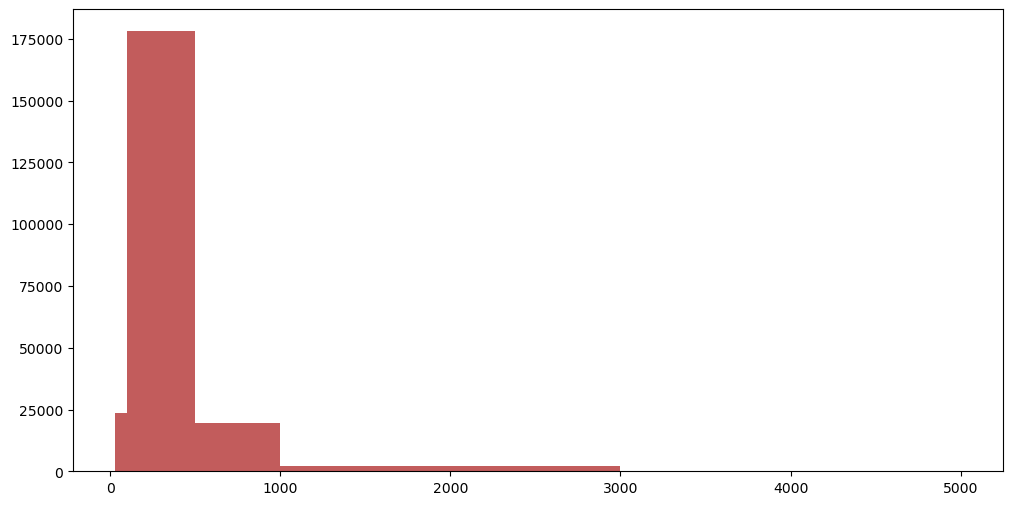

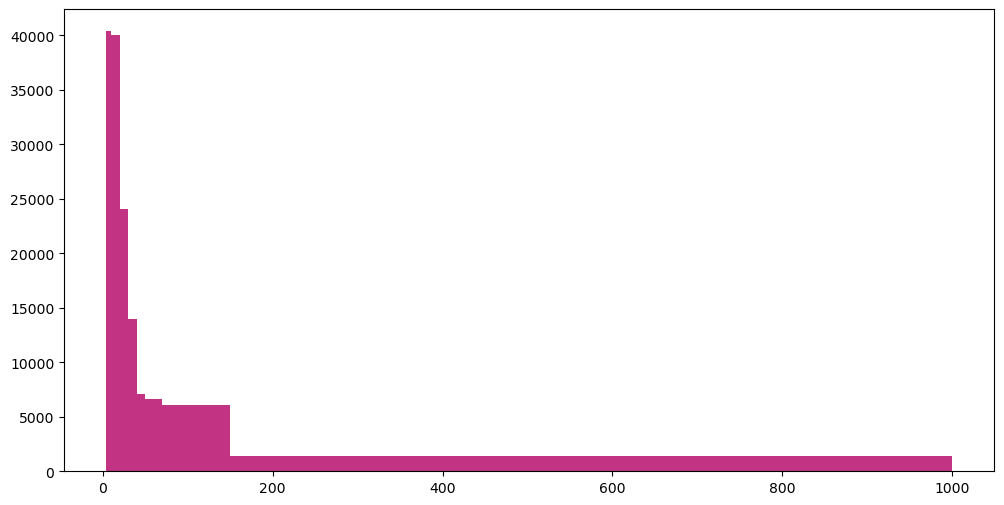

In [33]:
seqLen_bins = [30, 100, 500, 1000, 3000, 5000]
seqLen_counts, _, _ = bin_count(df_entityDataset, seqLen_bins, 'length')

idrLen_bins = [4, 10, 20, 30, 40, 50, 70, 150, 1000]
idrLen_counts, _, _ = bin_count(df_entityDataset, idrLen_bins, 'len_idr')

In [43]:
df_entityIDR.sort_values(by=['p_idr','len_idr'])[-20:]

,id,sequence,reference,clstr_id,fold,length,len_idr,p_idr
11346,7A8U_2,GPTVGGQLGTAGQGFSYSKSNGRGGSQAGGSGSAGQYGSDQQHHLG...,1111111111111111111111111111111111111111111111...,7A8U_2,3,209,198,0.947368
213867,5FA5_3,SGRGKGGKGLGKGGAKRHRK,11011111111111111111,3AZJ_2,3,20,19,0.950000
172210,3ZED_2,GPTASGMDAELQGLLQATMARAKEVKDAEVFKLLKLMSWTRKNDLT...,1111111111111111111111111111111111111111111111...,3ZED_2,4,242,230,0.950413
62788,7K17_2,EAKKKDQVTAQEIFQDNHEDGPTAKKLKTEQGGAHFSVSSLAEGSV...,1111111111111111111111111111111111111111111111...,7K17_2,4,192,183,0.953125
197502,3OFI_2,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,0001111111111111111111111111111111111111111111...,5ZBI_1,1,76,73,0.960526
165537,6T36_2,MQLFHLCLIISCSCPTVQASKLCLGWLWGMDIDPYKEFGASVELLS...,1111111111111111111111111111111111111111111111...,6T36_2,5,212,204,0.962264
137971,5NBQ_4,SKFTVKIKNKDKSGNWTDLGDLVVRKEENGIDTGLNAGGHSATFFS...,1111111111111111111111111111111111111111111111...,4BF3_1,5,134,129,0.962687
214625,5OKZ_10,GPDSMSANNGVTGKLSSRVMNMKFMKFGKTDDEESSNSNTPSNINS...,1111111111111111111111111111111111111111111111...,5OKZ_10,1,190,183,0.963158
138869,5YVG_2,GSMASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQS...,1111111111111111111111111111111111111111111111...,5YVG_2,5,528,510,0.965909
71850,5H2V_2,MSVEVDKHRNTLQYHKKNPYSPLFSPISTYRCYPRVLNNPSESRRS...,1111111111111111111111111111111111111111111111...,5H2V_2,4,150,145,0.966667


In [48]:
df_30_4_70 = df_entityIDR[(df_entityIDR['len_idr']<70)&(df_entityIDR['len_idr']>4)&(df_entityIDR['len_idr']>30)].sort_values(by=['p_idr'])
df_30 = df_entityIDR[(df_entityIDR['len_idr']>30)].sort_values(by=['p_idr'])

In [49]:
df_30['type'] = '30'
df_30_4_70['type'] = '30_4_70'

In [51]:
df_plot = pd.concat((df_30, df_30_4_70))

/home/dimeng/miniconda3/envs/py11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dimeng/miniconda3/envs/py11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dimeng/miniconda3/envs/py11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dimeng/miniconda3/envs/py11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

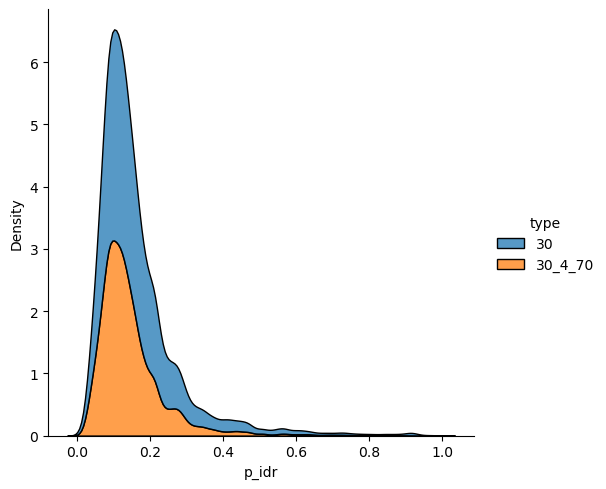

In [54]:
sns.displot(df_plot, x="p_idr", hue="type", kind="kde", multiple="stack")

In [ ]:
def get_idr_regionInfo(reference: str)->dict:
    for i, 